<a href="https://colab.research.google.com/github/Renator12/HESTON-NANDI-WILLOW/blob/main/calibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import numpy as np
import pandas as pd
import math
from scipy.optimize import *

In [ ]:
logreturns2010to15=np.array(df['log return'])

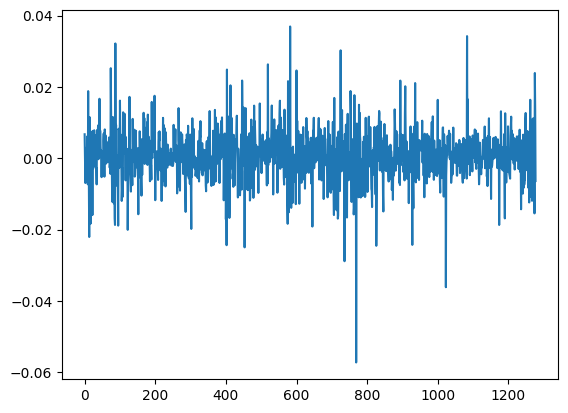

In [ ]:
df=pd.read_csv('returns2010to2015.csv')
plt.plot(df['log return'])

In [ ]:
logreturns=np.array(df['log return'])

In [ ]:
class NGARCH :
    def __init__(self,df,r = 0):

        self.df = df
        self.r = r
        self.NGarch_Log_Like()

    def NGarch(self,params):
        omega,Beta,alpha,gamma,lambda_  = params
        h = np.zeros(len(self.df))
        e = np.zeros(len(self.df))
        for i in range(0,len(self.df)):
            if i == 0:
                h[0] = (omega + alpha) / ( 1 - alpha * gamma**2 - Beta ) #Unconditional Variance
                if h[0] < 0 or 1 - alpha * gamma**2 - Beta < 1e-3 :#or w > 1e-8 or alpha > 1e-05 or w < 0 or alpha < 0 or Beta > 0.90 :
                    return 1e50
            else :
                h[i] = omega + Beta * h[i-1] + alpha * (e[i-1] - gamma * np.sqrt(h[i-1]))**2
                e[i] = (self.df[i] - self.r - lambda_ * h[i] )/np.sqrt(h[i])
        LogL = - .5 * np.sum(-np.log( 2 * np.pi) - np.log(h[:]) - (e[:])**2)
        return LogL

    def NGarch_Model(self):
        h = np.zeros(len(self.df))
        e = np.zeros(len(self.df))
        for i in range(0,len(self.df)):
            if i == 0:
                h[0] = (self.omega + self.alpha) / (1 - self.alpha * self.gamma**2 - self.Beta)
            else :
                h[i] =  self.omega + self.Beta * h[i-1] + self.alpha * (e[i-1]- self.gamma * np.sqrt(h[i-1]))**2
                e[i] = (self.df[i] - self.r - self.lambda_ * h[i]  )/np.sqrt(h[i])
        return h,e

    def NGarch_Log_Like(self):
        bounds = ((1e-8,1e-120),(1e-6,1),(1e-6,1e-12),(1e-10,1e3),(1e-10,100))
        sol = differential_evolution(self.NGarch,bounds = bounds,tol = 1e-9,polish = False,workers = -1)
        self.omega,self.Beta,self.alpha,self.gamma,self.lambda_ = sol.x
        print("Log Likelihood : {} ".format(-sol.fun))
        print(100 * "-")
        print(" Parameters : ",sol.x)
        print(100 * "-")

In [ ]:
f=NGARCH(logreturns,0.025)
#self.w,self.Beta,self.alpha,self.y,self.lambda_

Log Likelihood : 2849.177086061713 
----------------------------------------------------------------------------------------------------
 Parameters :  [9.99996340e-09 6.58358926e-01 9.99999997e-07 5.48003273e+02
 2.50435690e-08]
----------------------------------------------------------------------------------------------------


In [ ]:
omega,beta,alpha,gamma,lam=f.omega,f.Beta,f.alpha,f.gamma,f.lambda_

In [ ]:
#this calculates the epsilons and conditional variances
import numpy as np

def MLE_obj_trial(x,omega,beta,alpha,gamma,lam):
    n = len(x)
    mu = np.mean(x)
    h0 = np.std(x)
    r0 = 2.58 / 100
    epsilon = np.zeros(n)
    h = np.zeros(n + 1)
    h[0] = h0

    for i in range(n):
        epsilon[i] = (x[i] - (r0 + lam* h[i])) / np.sqrt(h[i])
        h[i + 1] = omega + beta * h[i] + alpha * (epsilon[i] - gamma* np.sqrt(h[i])) ** 2


    return epsilon,h

# Example usage:
epsilon, h = MLE_obj_trial(np.array(df['log return']), omega,beta,alpha,gamma,lam)


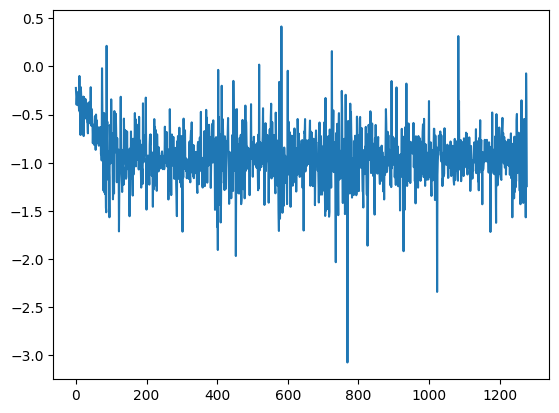

In [ ]:
plt.plot(epsilon)

In [ ]:
h=h[1:]

In [ ]:
x_k=(2.58/100 + (lam*h))+np.sqrt(h)*epsilon


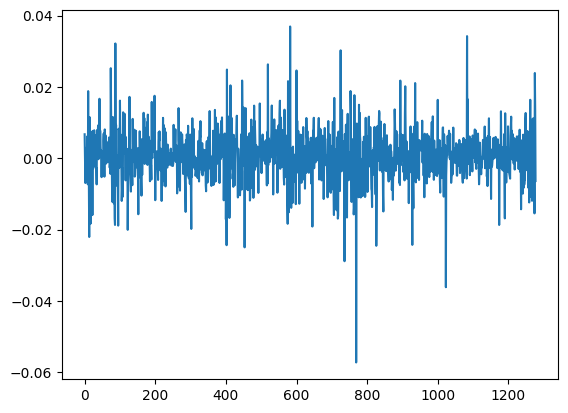

In [ ]:
plt.plot(df['log return'])

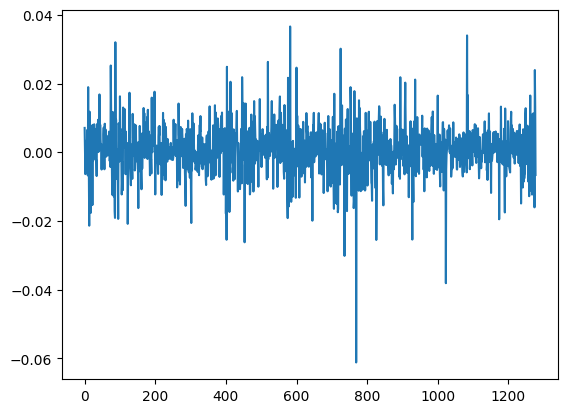

In [ ]:
plt.plot(x_k)

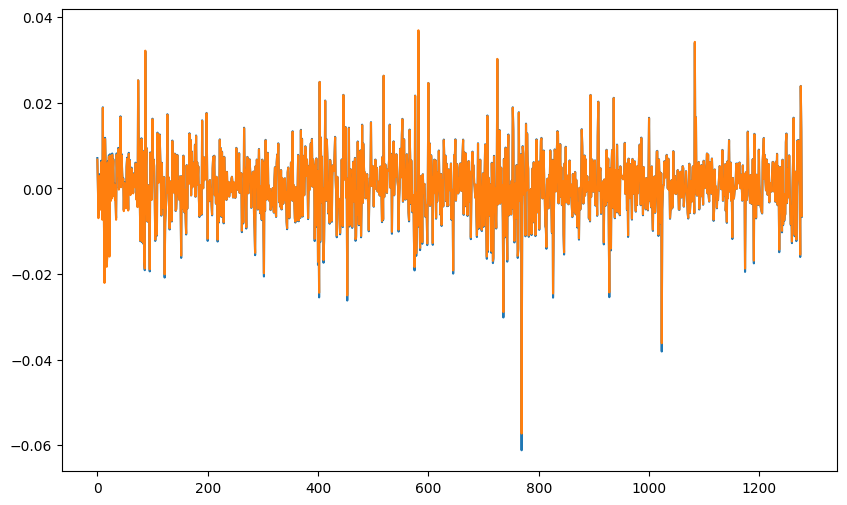

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x_k)
plt.plot(logreturns2010to15)#perfect calibration

In [ ]:
diff=x_k-(df['log return'])
mae=(np.sum(diff)**2)/1000
mae

6.26543695158545e-07

In [ ]:
#try on test set(2015-20)
from google.colab import files
uploaded = files.upload()

Saving logreturn2015to20.csv to logreturn2015to20 (1).csv


In [ ]:
df2=pd.read_csv('logreturn2015to20.csv')
logreturns2015to20=np.array(df2['log_return'])


In [ ]:
epsilon_2015to20, h_2015to20 = MLE_obj_trial(logreturns2015to20, omega,beta,alpha,gamma,lam)
h_2015to20=h_2015to20[1:]

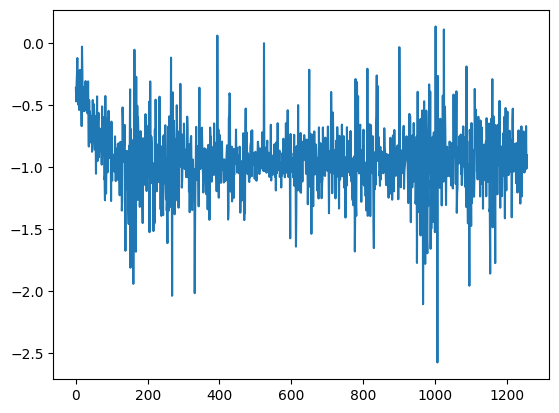

In [ ]:
plt.plot(epsilon_2015to20)

In [ ]:
x_k2015to20=(2.28/100 + (lam*h_2015to20))+np.sqrt(h_2015to20)*epsilon_2015to20


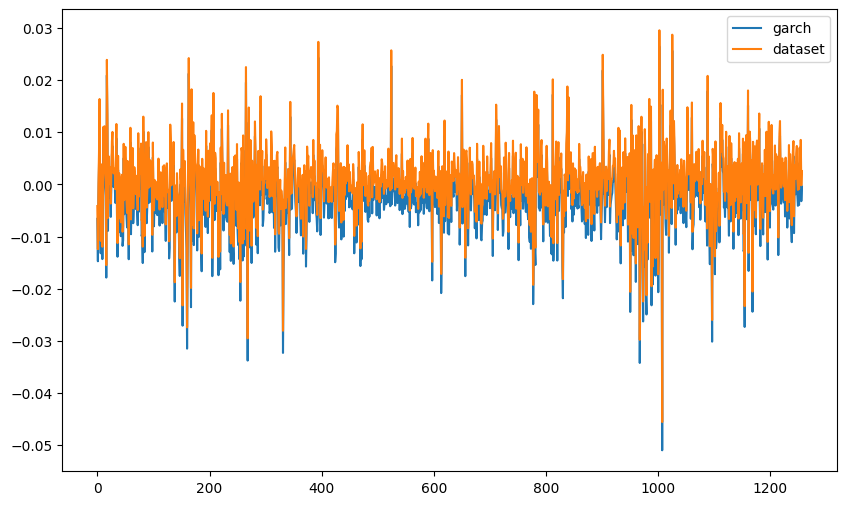

In [ ]:
plt.figure(figsize=(10, 6))#test set of parameters
plt.plot(x_k2015to20,label='garch')
plt.plot(logreturns2015to20,label='dataset')
plt.legend()

In [ ]:
diff=x_k2015to20-(logreturns2015to20)
mae=(np.sum(diff)**2)/1000
mae #mae error much higher than test set

0.014345402621989077

In [ ]:
lam

2.5043568996352406e-08